In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import sys
sys.path.append('..')
import pyFish
from pyFish.tests import load_sample_data
pyFish.__version__

ZMQInteractiveShell


'1.16'

In [3]:
M, t = load_sample_data('data/model_data/scalar/ternary.csv').T

Generating Slider data: 100%|██████████| 20/20 [00:01<00:00, 10.71it/s]


| Data Type (vector) : False      | Autocorellation time : 85       | Gaussian Noise : True    |
| M range : (-1.0, 1.0)    | M mean : 0.05               | |M| mean : 0.74       |

Dt = 9
dt= 1


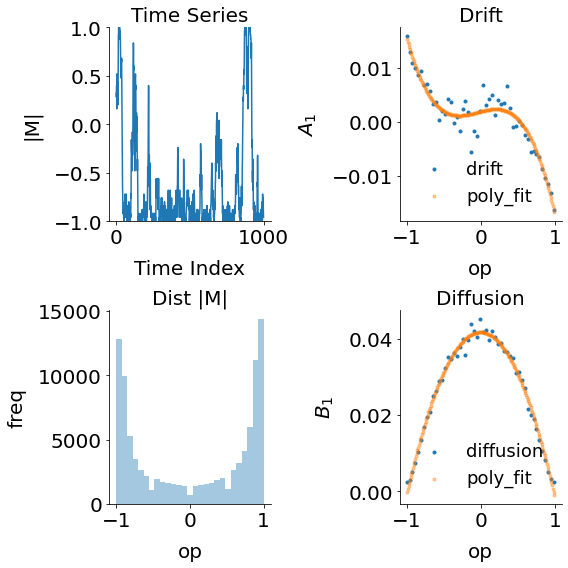

In [8]:
import pyFish
ch = pyFish.Characterize([M], t, n_dt=20)

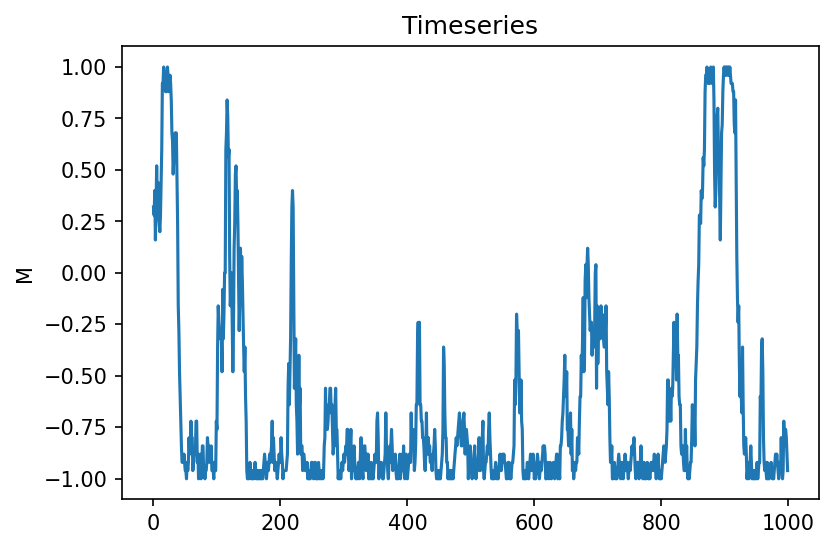

In [9]:
ch.timeseries()

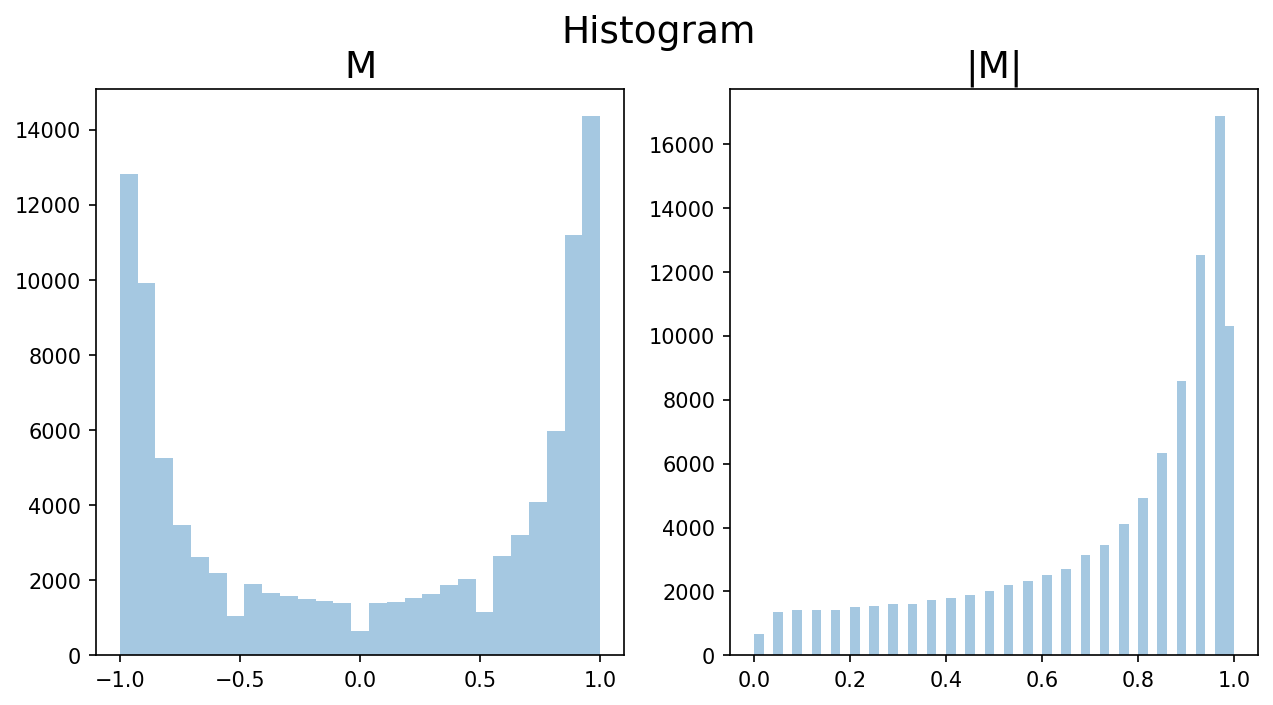

In [10]:
ch.histogram()

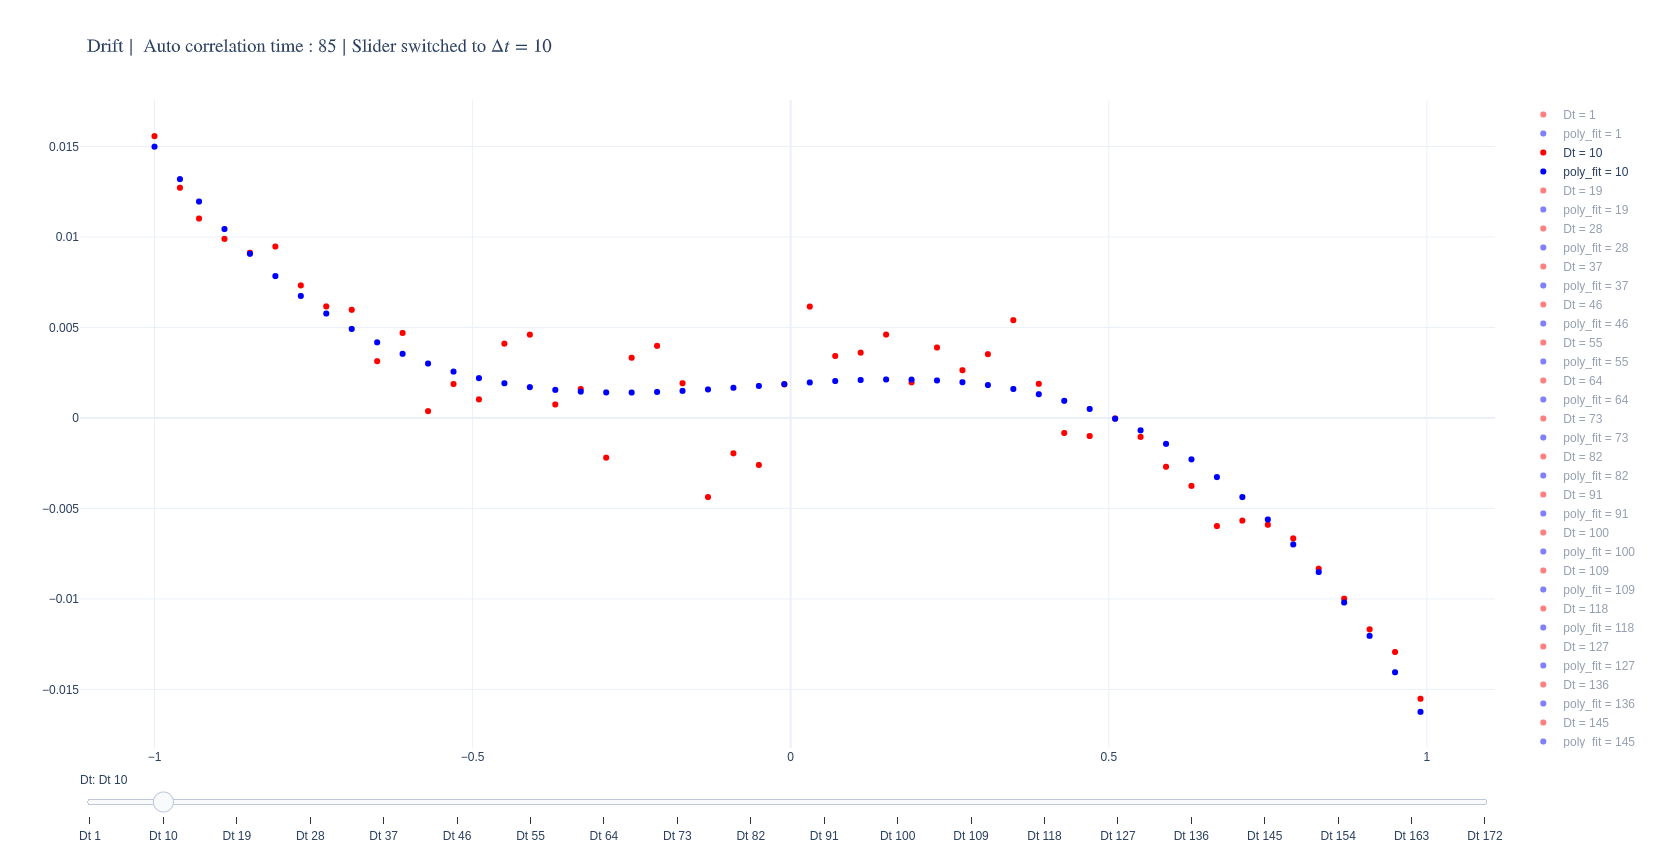

In [23]:
ch.drift()

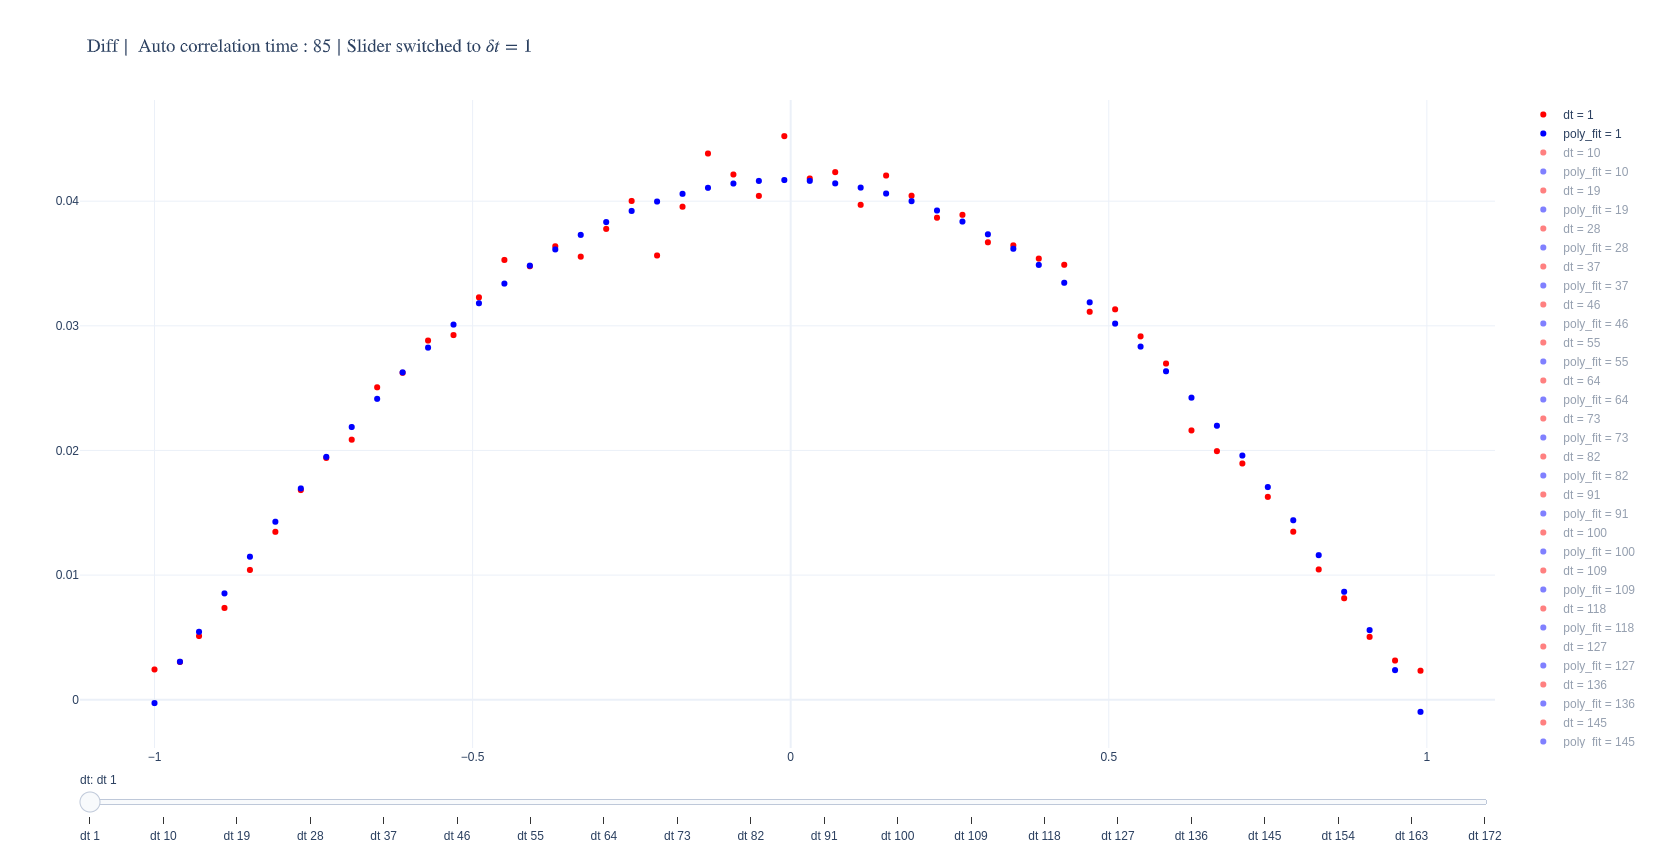

In [22]:
ch.diffusion()

In [73]:
data;

In [ ]:
ch._fit_poly(data[1][-1], data[1][0])

In [176]:
def slider_2d(slider_data, init_pos=0, prefix='Dt'):
    data = slider_data
    title_template = r"$\text{{ {0} |  Auto correlation time : {1} }} | \text{{ Slider switched to }}{2}= {3}$"
    if prefix == 'Dt':
        t = 'Drift'
        t_tex = "\Delta t"
    else:
        t = 'Diff'
        t_tex = "\delta t"
        
    # Create figure
    fig = go.Figure()
    # Add traces, one for each slider step
    dt_s = list(data.keys())
    opt_step = dt_s[init_pos]
    for step in sorted(data.keys()):
        v = 'legendonly'
        if step == opt_step:
            v = True
        poly, op = ch._fit_poly(data[step][-1], data[step][0], ch.drift_order)
        fig.add_trace(
            go.Scatter(
                visible=v,
                mode='markers',
                line=dict(color="red", width=6),
                name="{} = {}".format(prefix, str(step)),
                x=data[step][-1],
                y=data[step][0]))
        fig.add_trace(
            go.Scatter(
                visible=v,
                mode='markers',
                line=dict(color="blue", width=6),
                name="poly_fit = " + str(step),
                x=op,
                y=poly(op)))

    fig.update_layout(
        autosize=True,
        scene_aspectmode='cube',
        title_text=title_template.format(t, ch.autocorrelation_time,
                                         t_tex,
                                         dt_s[init_pos]),
        height=850,
        width=850,
        )

    # Create and add slider
    steps = []
    for i in range(len(dt_s)):
        step = dict(
            method="update",
            args=[{"visible": ['legendonly'] * len(fig.data)},
                  {"title": title_template.format(t, ch.autocorrelation_time, t_tex,  str(dt_s[i]))}],  # layout attribute
            label='{} {}'.format(prefix,
                     list(data.keys())[i]))
        
        #step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
        step['args'][0]['visible'][i * 2:i * 2 + 2] = [True for j in range(2)]
        steps.append(step)

    sliders = [dict(
        active=init_pos,
        currentvalue={"prefix": "{}: ".format(prefix)},
        #pad={"t": 50},
        steps=steps
    )]



    fig.layout.sliders = sliders
    fig.layout.template = 'plotly_white'

    return fig

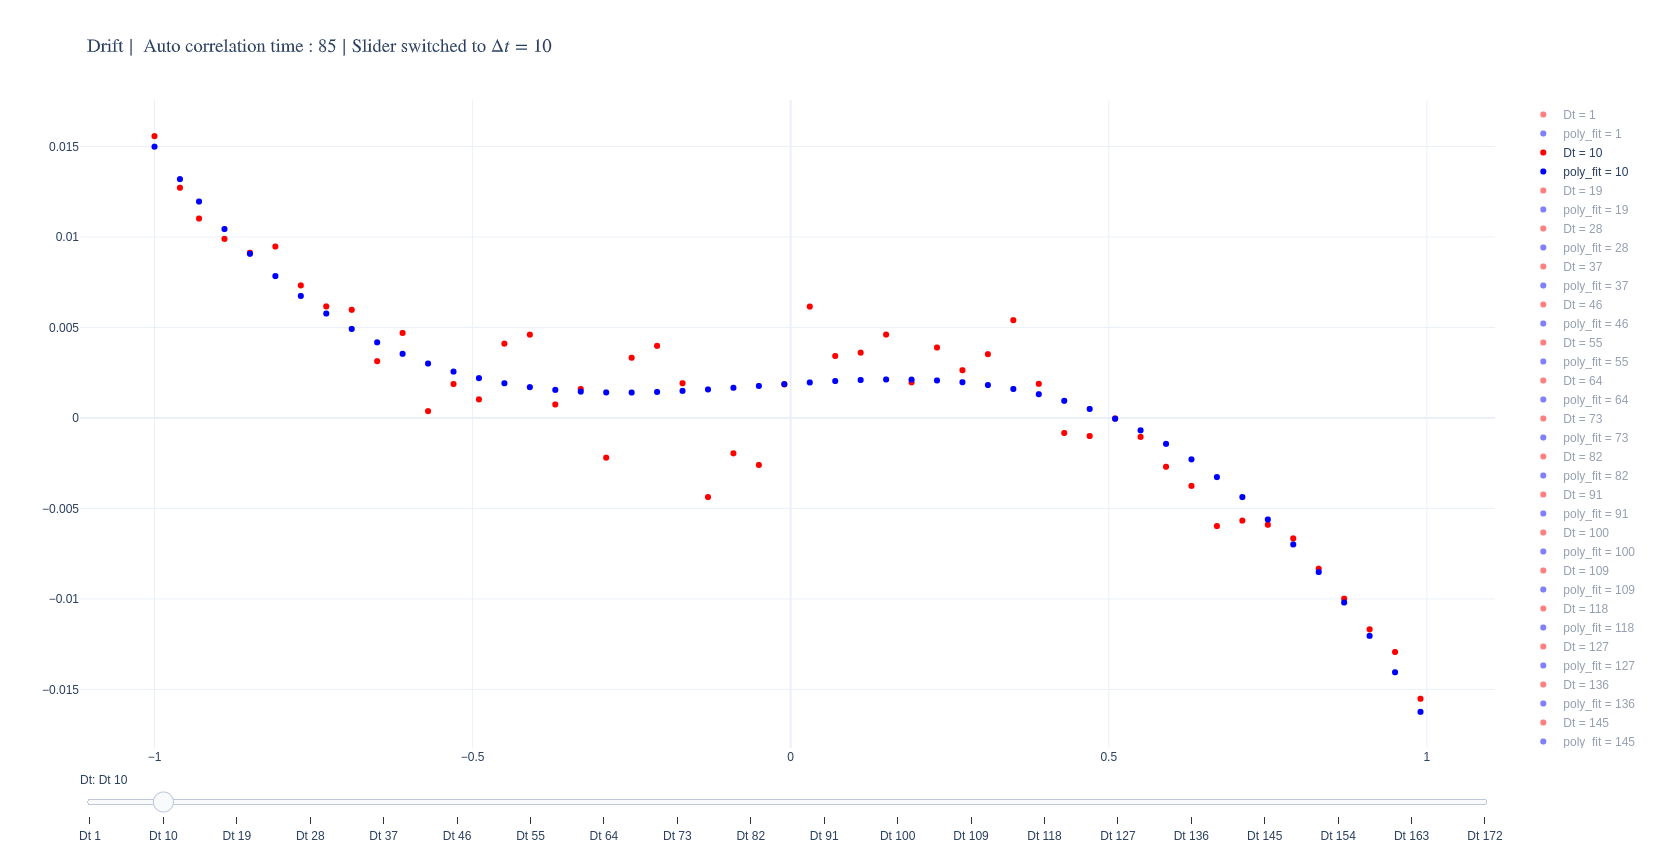

In [177]:
slider_2d(ch._ddsde._drift_slider, init_pos=1)

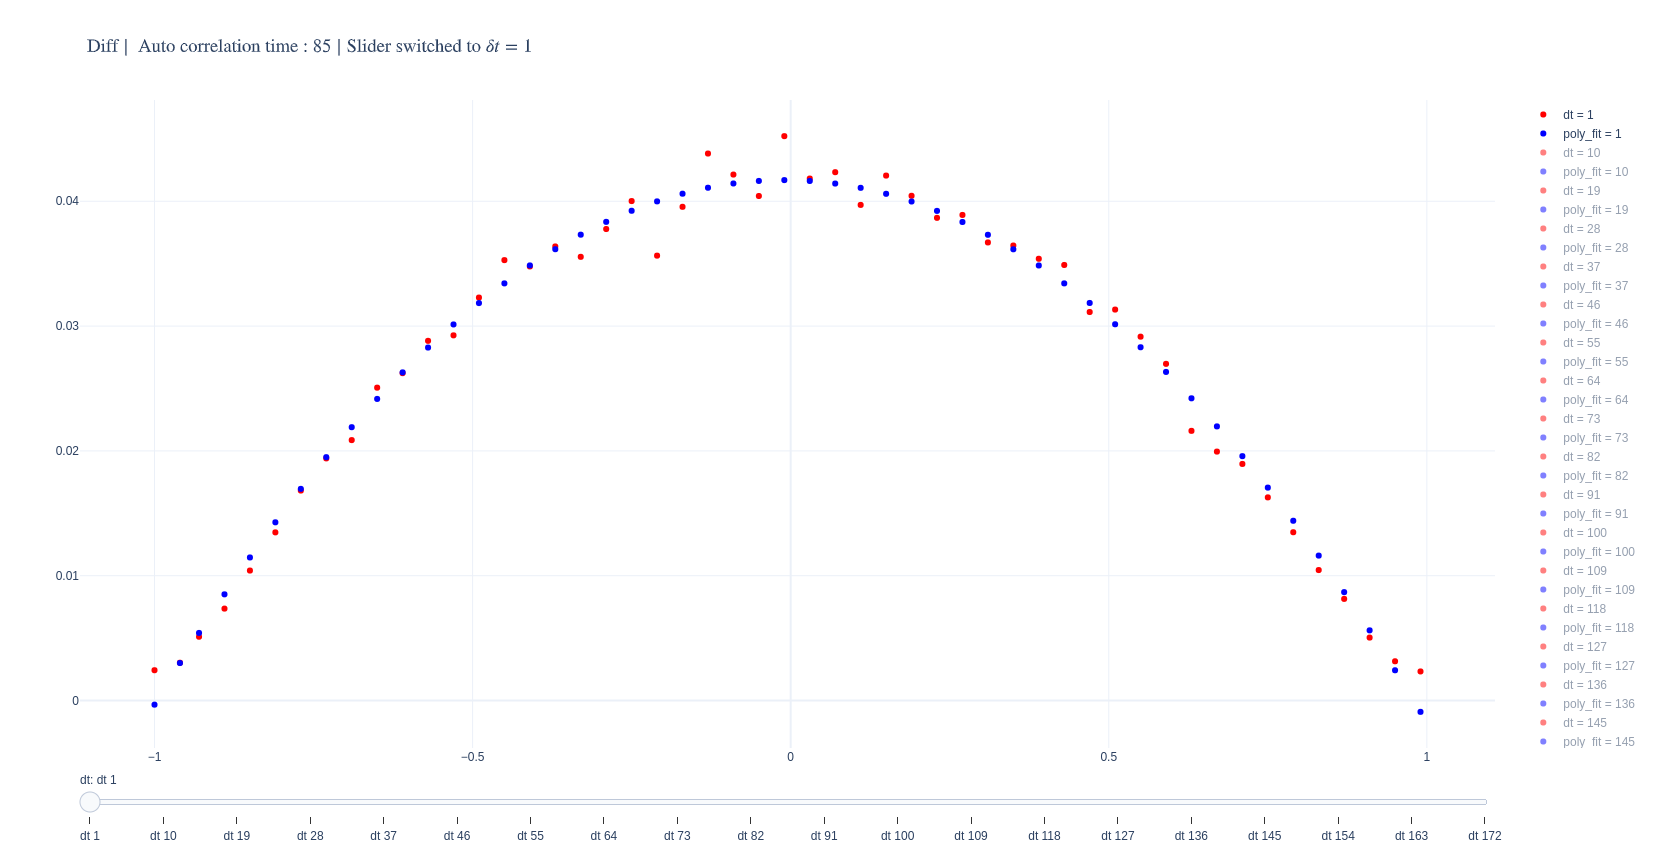

In [178]:
slider_2d(ch._ddsde._diff_slider, prefix='dt')

In [165]:
dt_s = list(data.keys())
np.abs(np.array(dt_s) - ch._ddsde.dt).argmin()

1

In [150]:
data.keys()

dict_keys([1, 10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100, 109, 118, 127, 136, 145, 154, 163, 172])